<a href="https://colab.research.google.com/github/nikita130104/Lets-Grow-More/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = pd.read_csv('/content/tataglobal.csv')
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


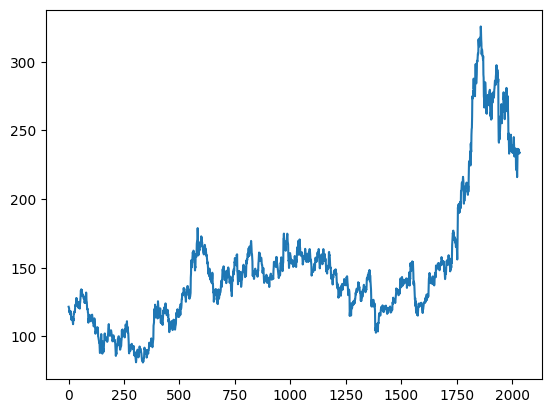

In [ ]:
plt.plot(df['Close'])

In [ ]:
df1=df['Close']

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1


array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1424, 611)

In [ ]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range (len(dataset)-time_step-1):
         a = dataset[i:(i+time_step)]
         dataX.append(a)
         dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test,ytest = create_dataset (test_data,time_step)


In [ ]:
print(X_train.shape),print(y_train.shape)

(1323, 100, 1)
(1323,)


(None, None)

In [ ]:
print(X_test.shape),print(ytest.shape)

(510, 100, 1)
(510,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 296ms/step - loss: 0.0121 - val_loss: 0.0015
Epoch 2/60
19/19 [==============================] - 3s 156ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 3/60
19/19 [==============================] - 3s 153ms/step - loss: 9.9481e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 154ms/step - loss: 8.9988e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 5s 268ms/step - loss: 8.7944e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 171ms/step - loss: 8.3857e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 156ms/step - loss: 8.0607e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 153ms/step - loss: 7.7121e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 228ms/step - loss: 7.7395e-04 - val_loss: 9.7843e-04
Epoch 10/60
19/19 [==============================] - 3s 155ms/step 

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


16/16 [==============================] - 1s 48ms/step


In [ ]:
train_predict1=scaler.inverse_transform(train_predict)
test_predict2=scaler.inverse_transform(test_predict)


In [ ]:
train_predict1


array([[115.00718 ],
       [113.513626],
       [112.69092 ],
       ...,
       [120.42695 ],
       [119.65553 ],
       [119.015335]], dtype=float32)

In [ ]:
test_predict2

array([[142.38718 ],
       [142.61066 ],
       [141.78946 ],
       [139.24791 ],
       [137.56006 ],
       [136.91052 ],
       [137.91568 ],
       [139.41374 ],
       [139.90424 ],
       [139.67761 ],
       [139.51239 ],
       [140.6385  ],
       [141.41974 ],
       [142.92482 ],
       [145.0514  ],
       [143.24326 ],
       [140.89497 ],
       [140.3837  ],
       [140.8416  ],
       [145.4979  ],
       [149.8534  ],
       [152.20105 ],
       [152.772   ],
       [150.9107  ],
       [150.62262 ],
       [150.27882 ],
       [150.52972 ],
       [152.05852 ],
       [152.79118 ],
       [152.86128 ],
       [153.28615 ],
       [152.2484  ],
       [149.18085 ],
       [143.71902 ],
       [140.25285 ],
       [139.0691  ],
       [139.0662  ],
       [138.32156 ],
       [136.23763 ],
       [132.8346  ],
       [130.37646 ],
       [129.10307 ],
       [127.0564  ],
       [126.13675 ],
       [124.18728 ],
       [121.67047 ],
       [120.820335],
       [120.4

In [ ]:
 import math
 from sklearn.metrics import mean_squared_error
 math.sqrt(mean_squared_error(y_train,train_predict))


0.013925882761354744

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))


0.013925882761354744

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))


0.03860212690555384

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))


0.03860212690555384

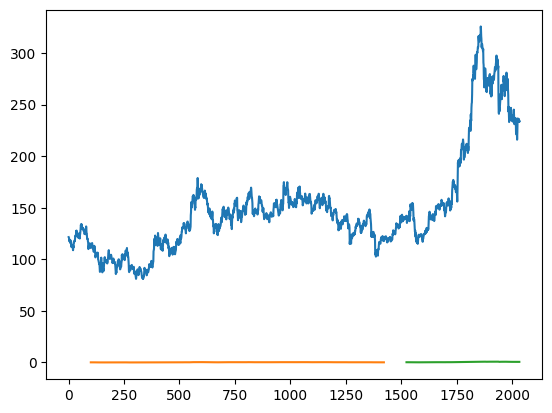

In [ ]:
look_back=100
trainPredictPlot =np.empty_like(df1)
trainPredictPlot[:,:] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot =np.empty_like(df1)
testPredictPlot[:,:] =np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt. show()



In [ ]:
len(test_data)

611

In [ ]:
X_input=test_data[511:].reshape(1,-1)
X_input.shape

(1, 100)

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= 100:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)




0 day input [0.85273693 0.86213235 0.83455882 0.84375    0.71466503 0.66053922
 0.65420752 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072
 0.70894608 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951
 0.74468954 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392
 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765
 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791
 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333
 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523
 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951
 0.66319444 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098
 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.551674

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot  as plt

In [ ]:
len(df1)

2035

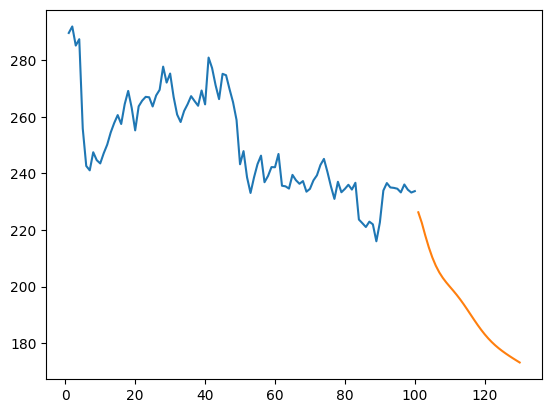

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

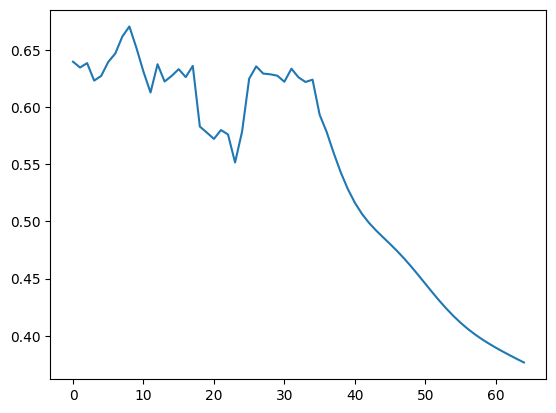

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

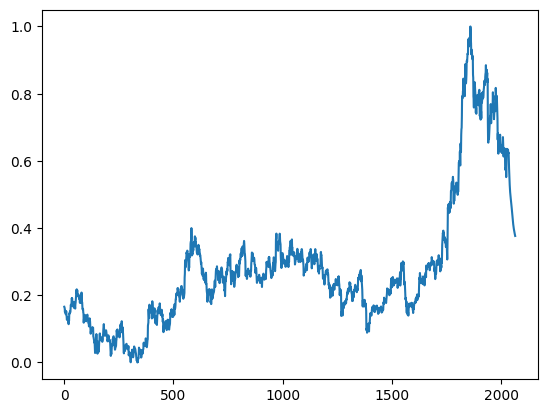

In [ ]:
plt.plot(df3)